***Equipe 04:***


*   Semcheddine Ikram
*   Sekkai Maria
*   Heddadji Nourelimane
*   Soltani Meriem
*   Taib Selma
*   Zerouki Selma
*   Mohamed mahmoud aref Zeinebou

### ***1.   Solution du probleme Bin Packing avec les metaheuristiques "Methodes de Recherche Locale"***


Ce notebook présente une solution au problème du Bin Packing en utilisant les méthodes de Recherche Locale (MetaHeuristique).La Recherche Locale (métaheuristique) est une approche algorithmique utilisée pour résoudre des problèmes d'optimisation dans lesquels l'objectif est de trouver la meilleure solution possible dans un espace de recherche complexe. Contrairement à certaines méthodes qui examinent systématiquement chaque possibilité, les métaheuristiques explorent de manière intelligente l'espace de recherche pour trouver des solutions de qualité acceptable dans un temps raisonnable.

Le notebook est divisé en différentes sections, chacune se concentrant sur une partie spécifique de la solution :
1. Importation des bibliothèques.
2. Implémentation de l'algorithme de choix du solution initial.
3. Implémentation de l'algorithme qui évalue une solution choisi(nombre de bin).
4. Implémentation de l'algorithme qui génere une solution voisine.
5. Implémentation de des algorithmes de choix des parametres.
5. Implémentation de des algorithmes de Recherche Locale :

   *   Hill-Climbing
   *   Recherche Tabou
   *   Recuit Simulé


7. Visualisation des résultats finals.
8. analyse des résultats en terme de performance.

**1.Importation des bibliothèques.**

Dans cette section, nous importons les bibliothèques nécessaires à notre solution.

In [1]:
import random
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

**2.Algorithme de choix du solution initial:**

  Pour sélectionner la solution initiale, nous avons mis en place une méthode qui consiste à attribuer un objet à un conteneur, bin, initial.

In [2]:
def random_packing(items, bin_capacity):
    bins = []  # List to store bins
    random.shuffle(items)  # Shuffle the items randomly

    for item in items:
        bins.append([item])

    return bins

**3.Algorithme d'évaluation d'une solution donnée:**

Cet algorithme calcule le nombre de conteneurs nécessaires pour une solution donnée.



In [3]:
def fitness(bins):
    return len(bins)

**4.Algorithme de generation des voisins(perturbation d'une solution donnée):**

Cet algorithme fonctionne en échangeant aléatoirement deux objets entre deux conteneurs, lorsque cela est faisable.

Tout d'abord, deux conteneurs sont sélectionnés au hasard. Ensuite, dans chaque conteneur choisi, un indice est généré de manière aléatoire pour représenter la position de l'objet à être permuté.

In [4]:
def generate_neighbor(solution, bin_capacity):
    # Make a copy of the current solution
    neighbor = [bin[:] for bin in solution]
    neighborT = [bin[:] for bin in solution]


    # Select two random bins
    bin1_index, bin2_index = random.sample(range(len(neighbor)), 2)

    item1_index = random.randint(0, len(neighborT[bin1_index]) - 1)
    item1 = neighborT[bin1_index].pop(item1_index)

    item2_index = random.randint(0, len(neighborT[bin2_index]) - 1)
    item2 = neighborT[bin2_index].pop(item2_index)

    if (sum(neighbor[bin2_index])+item1 < bin_capacity)  :
        neighbor[bin1_index]=neighborT[bin1_index]
        neighbor[bin2_index].append(item1)
        if(len(neighbor[bin1_index])==0):
            neighbor.remove(neighbor[bin1_index])

    elif (sum(neighbor[bin1_index]) +item2 < bin_capacity):
        neighbor[bin2_index]=neighborT[bin2_index]
        neighbor[bin1_index].append(item2)
        if(len(neighbor[bin1_index])==0):
            neighbor.remove(neighbor[bin2_index])

    return  neighbor





**Génération d'une solution initiale:**

In [16]:
with open("BPP_750_500_0.1_0.7_0.txt", "r") as file:
  num_objects = int(file.readline().strip())
  bin_capacity = int(file.readline().strip())
  items = [int(line.strip()) for line in file]

In [17]:
initial_solution =  random_packing(items, bin_capacity)
print("Initial solution (random packing):", initial_solution)
print("Initial fitness (number of bins):", fitness(initial_solution))

Initial solution (random packing): [[182], [227], [337], [127], [135], [253], [80], [305], [96], [138], [80], [73], [158], [106], [267], [138], [158], [330], [213], [229], [205], [273], [97], [234], [275], [285], [144], [310], [68], [166], [56], [266], [304], [152], [330], [158], [260], [224], [222], [286], [176], [258], [298], [194], [144], [345], [83], [208], [232], [113], [151], [94], [317], [152], [280], [60], [80], [171], [160], [158], [348], [77], [298], [309], [207], [56], [64], [293], [179], [178], [259], [337], [99], [224], [54], [68], [73], [171], [119], [316], [344], [313], [315], [277], [138], [243], [164], [152], [198], [237], [226], [95], [302], [67], [113], [263], [84], [124], [99], [282], [305], [343], [265], [173], [227], [88], [61], [71], [96], [75], [324], [339], [219], [307], [313], [261], [224], [156], [57], [281], [98], [320], [222], [191], [78], [70], [343], [217], [212], [167], [177], [87], [56], [127], [68], [165], [110], [287], [105], [310], [297], [341], [175

**5.Choix des parametres:**

Le choix des paramètres est essentiel pour obtenir de bons résultats, c'est-à-dire des résultats qui se rapprochent de la solution optimale. Pour ce faire, nous avons adopté la méthode de test, dans laquelle nous avons essayé de nombreuses valeurs pour les paramètres. Ensuite, nous avons dressé un graphique qui illustre le bon choix des valeurs des paramètres.

**1 methode : Hill Climbing**

Dans cet algorithme, nous explorons plusieurs valeurs d'itération pour la méthode de Hill-Climbing. Ensuite, nous construisons un graphe représentant le nombre de conteneurs en fonction du nombre d'itérations afin de déterminer en fin de compte le nombre optimal d'itérations.





In [ ]:
def Convergence_analysis_HillClimbing():

    iterations = [100, 500, 1000, 5000, 10000, 15000, 20000]
    bins_number = []

    for i in range(len(iterations)):  # Iterate over indices of the list
        solution, fitness = hill_climbing(initial_solution, bin_capacity, max_iterations=iterations[i])
        bins_number.append(fitness)  # Use append instead of add for lists

    return iterations, bins_number


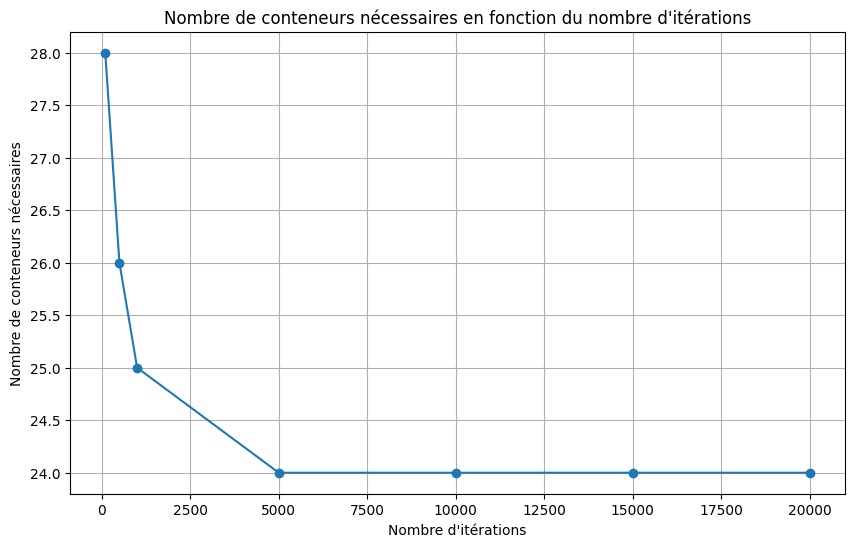

In [ ]:
iterations, bins_number = Convergence_analysis_HillClimbing()  # Ensure correct function call and unpacking of returned values

plt.figure(figsize=(10, 6))
plt.plot(iterations, bins_number, marker='o', linestyle='-')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Nombre de conteneurs nécessaires')
plt.title('Nombre de conteneurs nécessaires en fonction du nombre d\'itérations')
plt.grid(True)
plt.show()

Le graphique ci-dessus montre qu'avec un nombre d'itérations de 5000, nous obtenons un bon résultat de 24 (sachant que la solution avec la méthode exacte donne 23 conteneurs). Au-delà de 5000 itérations, la solution ne change pas, mais seulement le coût en termes de temps d'exécution augmente.

**2 methode : Recherche Tabou**

Cet algorithme implique l'exploration de diverses valeurs pour les itérations et les tailles de liste tabou dans la méthode de Recherche Tabou. Ensuite, nous utilisons ces données pour générer un graphique représentant le nombre de conteneurs en fonction du nombre d'itérations et de la taille de la liste tabou. L'objectif final est de déterminer les valeurs optimales pour les itérations et la taille de la liste tabou.

In [ ]:
def Convergence_analysis_RT():
    iterations = [100, 500, 1000, 5000, 10000]
    taille_liste_tabou = [5, 10, 15, 20]
    bins_number = np.zeros((len(iterations), len(taille_liste_tabou)))  # Initialize bins_number with appropriate dimensions

    for i in range(len(iterations)):
        for j in range(len(taille_liste_tabou)):
            solution, nombre_bins = tabu_search(initial_solution, bin_capacity, iterations[i], taille_liste_tabou[j])
            bins_number[i, j] = nombre_bins

    return iterations, taille_liste_tabou, bins_number

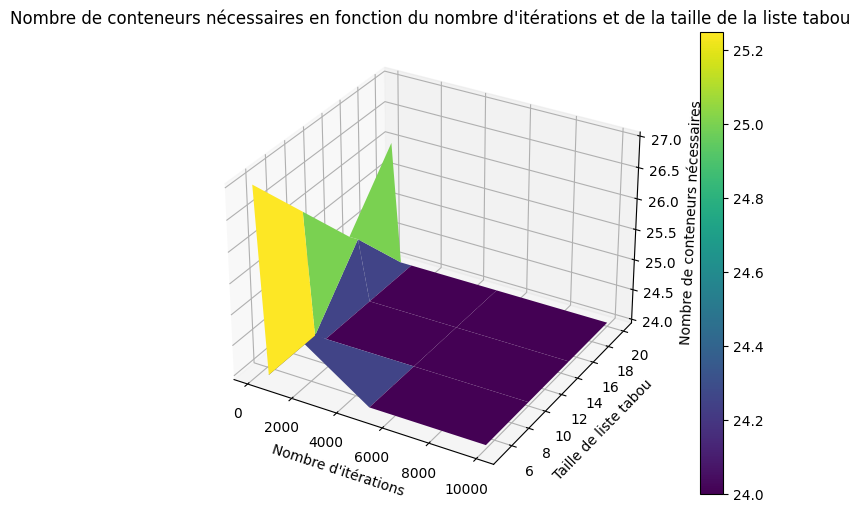

In [ ]:
# Call the Convergence_analysis_RT() function
iterations, taille_liste_tabou, bins_number = Convergence_analysis_RT()

# Create coordinate grid for 3D plot
X, Y = np.meshgrid(iterations, taille_liste_tabou)

# Transpose bins_number to match the dimensions of X and Y
bins_number = bins_number.T

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, bins_number, cmap='viridis')

# Add labels and title
ax.set_xlabel('Nombre d\'itérations')
ax.set_ylabel('Taille de liste tabou')
ax.set_zlabel('Nombre de conteneurs nécessaires')
plt.title('Nombre de conteneurs nécessaires en fonction du nombre d\'itérations et de la taille de la liste tabou')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()


Le graphique ci-dessus met en évidence qu'avec 5000 itérations et une taille de liste tabou variant de 5 à 20, nous obtenons un résultat satisfaisant de 24 (alors que la solution avec cette méthode exacte donne 23 conteneurs). En conséquence, nous avons choisi "nombre d'iteration =5000 et taille de la liste = 10"comme valeurs pour les paramètres.

**3 methode : Recuit simulé**

Cet algorithme consiste à explorer différentes valeurs pour les itérations et les températures dans la méthode du Recuit Simulé. Ensuite, ces données sont utilisées pour créer un graphique illustrant le nombre de conteneurs en fonction du nombre d'itérations et de la température. L'objectif ultime est de trouver les valeurs optimales pour les itérations et la température.

In [ ]:
def Convergence_analysis_RS():
    iterations = [100, 500, 1000, 5000, 10000]
    liste_temputure = [50, 60, 70, 80,90,100]
    bins_number = np.zeros((len(iterations), len(liste_temputure)))

    for i in range(len(iterations)):
        for j in range(len(liste_temputure)):
            solution, nombre_bins = simulated_annealing(initial_solution, bin_capacity, iterations[i], liste_temputure[j])
            bins_number[i, j] = nombre_bins

    return iterations, liste_temputure, bins_number

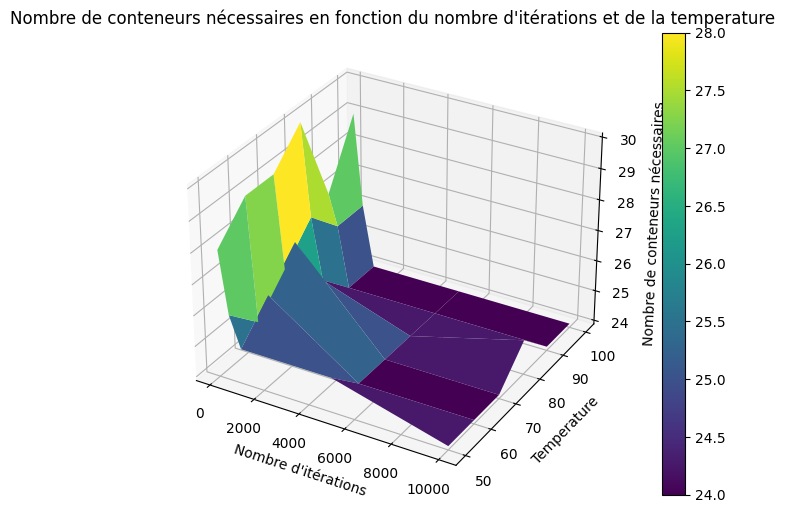

In [ ]:
# Call the Convergence_analysis_RS() function
iterations, liste_temputure, bins_number = Convergence_analysis_RS()

# Create coordinate grid for 3D plot
X, Y = np.meshgrid(iterations, liste_temputure)

# Transpose bins_number to match the dimensions of X and Y
bins_number = bins_number.T

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, bins_number, cmap='viridis')

# Add labels and title
ax.set_xlabel('Nombre d\'itérations')
ax.set_ylabel('Temperature')
ax.set_zlabel('Nombre de conteneurs nécessaires')
plt.title('Nombre de conteneurs nécessaires en fonction du nombre d\'itérations et de la temperature')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()


Le graphique ci-dessus met en évidence qu'avec 5000 itérations (ou au dela de 5000) et une temperature entre 90 et 100, nous obtenons un résultat satisfaisant de 24 (alors que la solution avec cette méthode exacte donne 23 conteneurs). En conséquence, nous avons choisi "nombre d'iteration=5000 et temperature =100 "comme valeurs pour les paramètres.

**6.Algorithme de Recherche Locale:**

**1 methode : Hill Climbing**


Le Hill Climbing est une méthode de recherche locale utilisée dans le problème du bin packing.

Dans le Hill Climbing, une solution initiale est évaluée, puis des solutions voisines sont générées en apportant des modifications locales à la solution actuelle, telles que le déplacement d'objets entre conteneurs. La meilleure solution parmi les solutions voisines est sélectionnée, et le processus est répété jusqu'à ce qu'un critère d'arrêt soit atteint.

In [ ]:
def hill_climbing(initial_solution, bin_capacity, max_iterations):
    current_solution = initial_solution
    current_fitness = fitness(current_solution)

    # Iterate until a maximum number of iterations is reached
    for iteration in range(max_iterations):
        # Find a neighbor solution
        neighbor_solution = generate_neighbor(current_solution, bin_capacity)

        # Calculate the fitness of the neighbor solution
        neighbor_fitness = fitness(neighbor_solution)


        # If the neighbor solution is better, update the current solution
        if neighbor_fitness <= current_fitness:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness

    # Print the last iteration it stopped at
    print(f"Stopped at iteration: {iteration + 1}")

    return current_solution,current_fitness

**2 methode : Recherche Tabou**

La méthode de Recherche Tabou suit un principe similaire à celui du Hill Climbing, mais elle intègre une liste tabou qui enregistre les L dernières solutions découvertes. Cette liste empêche le choix de solutions déjà explorées, et elle est mise à jour régulièrement. Lorsque la liste est pleine, l'élément le plus ancien est retiré pour faire de la place pour de nouvelles solutions.

In [8]:
def tabu_search(initial_solution, bin_capacity, max_iterations, tabu_size):
    current_solution = initial_solution
    current_fitness = fitness(current_solution)
    tabu_list = []  # Initialize tabu list
    best_neighbor_solution = current_solution
    best_neighbor_fitness = current_fitness

    # Iterate until a maximum number of iterations is reached
    for iteration in range(max_iterations):
        # Find the best neighbor solution

        for _ in range(10):  # Try 10 random neighbors
            neighbor_solution = generate_neighbor(current_solution, bin_capacity)
            neighbor_fitness = fitness(neighbor_solution)

            if neighbor_fitness <= best_neighbor_fitness and neighbor_solution not in tabu_list:
                best_neighbor_solution = neighbor_solution
                best_neighbor_fitness = neighbor_fitness


        # Update current solution and fitness
        current_solution = best_neighbor_solution
        current_fitness = best_neighbor_fitness

        # Update tabu list
        tabu_list.append(best_neighbor_solution)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)  # Remove oldest solution from tabu list

    # Print the last iteration it stopped at
    print(f"Stopped at iteration: {iteration + 1}")

    return current_solution, current_fitness

**3 methode : Recuit Simulé**

Le recuit simulé pour le problème du bin packing est une approche probabiliste qui cherche une solution optimale ou proche de l'optimum en explorant l'espace des solutions de manière aléatoire. Initialement, une solution est générée, puis des perturbations aléatoires sont appliquées pour explorer des solutions voisines. Ces solutions sont acceptées en fonction de leur qualité par rapport à la solution actuelle, avec une probabilité qui diminue progressivement avec le temps. Le processus se poursuit jusqu'à ce qu'un critère d'arrêt soit atteint(dans notre cas le nombre d'iterations)

In [ ]:
def simulated_annealing(initial_solution, bin_capacity, max_iterations, initial_temperature, cooling_rate=0.99):
    current_solution = initial_solution
    current_fitness = fitness(current_solution)
    best_solution = current_solution
    best_fitness = current_fitness
    temperature = initial_temperature

    # Iterate until a maximum number of iterations is reached
    for iteration in range(max_iterations):
        # Find a neighbor solution
        neighbor_solution = generate_neighbor(current_solution, bin_capacity)

        # Calculate the fitness of the neighbor solution
        neighbor_fitness = fitness(neighbor_solution)

        # If the neighbor solution is better, update the current solution
        if neighbor_fitness <= current_fitness:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness
            # Check if the neighbor is the best solution so far
            if current_fitness <= best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness
        else:
            # If the neighbor solution is worse, accept it with a probability based on the temperature
            delta_fitness = neighbor_fitness - current_fitness
            acceptance_probability = math.exp(-delta_fitness / temperature)
            if random.random() < acceptance_probability:
                current_solution = neighbor_solution
                current_fitness = neighbor_fitness

        # Cool down the temperature
        temperature *= cooling_rate

    # Print the last iteration it stopped at
    print(f"Stopped at iteration: {iteration + 1}")

    return best_solution, best_fitness

**Resultat final:**

In [ ]:
print("Solution HIll climbing ")
start_time = time.time()

best_solution ,best_fitness= hill_climbing(initial_solution, bin_capacity,5000)

end_time = time.time()

elapsed_time = end_time - start_time
print("\nBest solution after hill_climbing", best_solution)
print("Best fitness (number of bins):", best_fitness)
print("Time taken for execution (in seconds):", elapsed_time)

Solution HIll climbing 
Stopped at iteration: 5000

Best solution after hill_climbing [[22, 25], [33, 16], [26, 21], [26, 22], [35, 13], [32], [33, 16], [28, 7], [31, 16], [34, 7], [27, 20], [25, 13, 9], [30], [30, 16], [35, 13], [34, 10], [34], [33, 12], [28, 16], [26, 7, 10, 5], [31, 18], [29, 18], [26, 7, 11], [28, 11, 9]]
Best fitness (number of bins): 24
Time taken for execution (in seconds): 0.0682525634765625


In [18]:
print("Solution avec recherche Tabou")
start_time = time.time()
best_solution ,best_fitness= tabu_search(initial_solution, bin_capacity,5000,10)
end_time = time.time()

elapsed_time = end_time - start_time
print("\nBest solution after recherche Tabou:", best_solution)
print("Best fitness (number of bins):", best_fitness)
print("Time taken for execution (in seconds):", elapsed_time)

Solution avec recherche Tabou
Stopped at iteration: 5000

Best solution after recherche Tabou: [[223, 204], [337, 160], [253, 224], [207, 89, 174], [161, 145, 72, 56], [205, 61, 158], [195, 226], [223, 126], [227, 166, 64], [184, 154, 158], [234, 65, 150], [310, 132], [257, 125, 55], [266, 213], [304, 177], [164, 139, 53, 88], [298, 143], [345, 113], [208, 173, 118], [297, 94, 54], [311, 130], [317, 99], [217, 172, 84], [348, 95], [337, 107], [261, 201], [297, 107], [344, 143], [313, 166], [208, 281], [178, 99, 179], [218, 182, 54], [265, 147], [226, 247], [302, 183], [212, 183], [262], [263, 151, 84], [309, 170], [224, 96, 103], [305, 60], [343, 116], [185, 114, 119, 71], [203, 230, 66], [324, 112, 60], [339, 127], [274, 167], [156, 195], [124, 99, 83, 124], [226, 165, 78], [292, 112, 67], [291, 163], [253, 158, 67], [200, 139, 111], [290, 122, 79], [269, 88], [193, 227, 77], [216, 222], [341, 117], [203, 110, 72], [170, 168, 142], [192], [166, 165], [238, 197], [278, 92, 58, 60], [31

In [ ]:
print("Solution avec Recuit simulé ")
start_time = time.time()
best_solution ,best_fitness= simulated_annealing(initial_solution, bin_capacity,5000,100)
end_time = time.time()
elapsed_time = end_time - start_time
print("\nBest solution after simulated annealing:", best_solution)
print("Best fitness (number of bins):", best_fitness)
print("Time taken for execution (in seconds):", elapsed_time)

Solution avec Recuit simulé 
Stopped at iteration: 5000

Best solution after simulated annealing: [[31], [33, 16], [28, 16], [35, 10], [33, 9, 7], [32, 7], [25], [27, 21], [28, 7, 9], [29], [22, 16], [33], [25, 11, 13], [35, 13], [30, 7], [34, 10], [34, 11], [26, 18], [26, 20], [31, 12, 5], [26, 16], [22, 26], [34, 13], [30, 16], [28, 18]]
Best fitness (number of bins): 25
Time taken for execution (in seconds): 0.12085700035095215


**8.Analyse des résultats en terme de performance:**

Nous avons testé plusieurs methodes sur le même ensemble de données de référence et avons constaté que le temps d'exécution pour la solution de Hill Climbing était moins important que le coût d'exécution des méthodes de Recuit Simulé et de Recherche Tabou. Cela est dû au calcul et au réglage d'un plus grand nombre de paramètres par rapport au Hill Climbing. Cependant, nous avons observé que ces dernières méthodes produisent des solutions de meilleure qualité que le Hill Climbing, car ce dernier peut être limité par les optims locaux.

**Conclusion:**

les métaheuristiques, en particulier la recherche locale, offrent des solutions efficaces pour résoudre le problème du bin packing. Chaque méthode, comme le Hill Climbing, la Recherche Tabou et le Recuit Simulé, présente des avantages et *des* inconvénients. Le Hill Climbing est simple mais peut être limité par les optima locaux, tandis que la Recherche Tabou et le Recuit Simulé peuvent mieux explorer l'espace des solutions mais nécessitent plus de temps de calcul et de réglages de paramètres. En général, la recherche locale peut fournir des solutions de qualité acceptable dans des délais raisonnables pour de nombreuses instances du problème du bin packing, mais pour des instances plus complexes, d'autres techniques d'optimisation peuvent être nécessaires.